## Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Gathering Data

In [138]:
df_std = pd.read_csv('./datasets/AWOS Middle/L0250205.csv')
df_uut = pd.read_csv('./datasets/AWOS Middle/PLM_MG_0506feb.csv')

In [139]:
df_std.head()

,Unnamed: 0,Unnamed: 1,PressureMeas_1m,Unnamed: 3,TAStat155_1m_1,Unnamed: 5,RHStat155_1m_1,Unnamed: 7,SRMeasQMS101R_1m,Unnamed: 9,...,QFE_1m,Unnamed: 13,QNH_1m,Unnamed: 15,WS_1m,Unnamed: 17,WD_1m,Unnamed: 19,TGMeasQMT103_1m,Unnamed: 21
0,time,status,Avg,status,Avg,status,Avg,status,Avg,status,...,QF,status,QNH,status,Avg,status,Avg,status,Avg,NaN
1,2/5/25 12:00:07 AM,VALID,1007.317,VALID,24.342,VALID,93.877,VALID,46.279,VALID,...,1007.317,VALID,1007.173,VALID,1.955,VALID,311.973,INVALID,0.0,NaN
2,2/5/25 12:01:06 AM,VALID,1007.312,VALID,24.361,VALID,93.832,VALID,46.669,VALID,...,1007.312,VALID,1007.169,VALID,1.455,VALID,305.436,INVALID,0.0,NaN
3,2/5/25 12:02:06 AM,VALID,1007.308,VALID,24.372,VALID,93.769,VALID,46.877,VALID,...,1007.308,VALID,1007.165,VALID,1.415,VALID,308.137,INVALID,0.0,NaN
4,2/5/25 12:03:06 AM,VALID,1007.316,VALID,24.407,VALID,93.899,VALID,47.097,VALID,...,1007.316,VALID,1007.173,VALID,1.503,VALID,313.579,INVALID,0.0,NaN


In [140]:
df_uut.head()

,Date and Time,Air Tmp (C) M,BP 1 Min (inHg) M,Mag WD (deg) M,RH (%) M,Solar Rad (W/m^2) M,WS (kt) M
0,05/02/2025 00:00:00,24.11,29.75,302.0,99.3,35.7400,2.0
1,05/02/2025 00:01:00,24.17,29.75,313.0,99.3,38.5992,2.0
2,05/02/2025 00:02:00,24.17,29.75,296.0,99.3,42.8880,4.0
3,05/02/2025 00:03:00,24.17,29.75,326.0,99.3,47.1768,3.0
4,05/02/2025 00:04:00,24.11,29.75,307.0,99.3,48.6064,2.0


## Preprocessing Data

### Data Alat Standard

Atur ulang header data

In [141]:
set_col_std = ['timestamp', 'statP', 'PressureMeas_1m', 'statTA',
       'TAStat155_1m_1', 'statRH', 'RHStat155_1m_1', 'statSR',
       'SRMeasQMS101R_1m', 'StatPR', 'PRMeasQMR101_1', 'StatQFE',
       'QFE_1m', 'StatQNH', 'QNH_1m', 'StatWS', 'WS_1m',
       'StatWD', 'WD_1m', 'StatTG', 'TGMeasQMT103_1m']
    
df_std = df_std.drop(columns='Unnamed: 21') #hapus kolom lebih
df_std = df_std.drop([0])
df_std.columns = set_col_std #ubah format header standar
df_std.head()

,timestamp,statP,PressureMeas_1m,statTA,TAStat155_1m_1,statRH,RHStat155_1m_1,statSR,SRMeasQMS101R_1m,StatPR,...,StatQFE,QFE_1m,StatQNH,QNH_1m,StatWS,WS_1m,StatWD,WD_1m,StatTG,TGMeasQMT103_1m
1,2/5/25 12:00:07 AM,VALID,1007.317,VALID,24.342,VALID,93.877,VALID,46.279,VALID,...,VALID,1007.317,VALID,1007.173,VALID,1.955,VALID,311.973,INVALID,0.0
2,2/5/25 12:01:06 AM,VALID,1007.312,VALID,24.361,VALID,93.832,VALID,46.669,VALID,...,VALID,1007.312,VALID,1007.169,VALID,1.455,VALID,305.436,INVALID,0.0
3,2/5/25 12:02:06 AM,VALID,1007.308,VALID,24.372,VALID,93.769,VALID,46.877,VALID,...,VALID,1007.308,VALID,1007.165,VALID,1.415,VALID,308.137,INVALID,0.0
4,2/5/25 12:03:06 AM,VALID,1007.316,VALID,24.407,VALID,93.899,VALID,47.097,VALID,...,VALID,1007.316,VALID,1007.173,VALID,1.503,VALID,313.579,INVALID,0.0
5,2/5/25 12:04:06 AM,VALID,1007.314,VALID,24.409,VALID,93.849,VALID,47.185,VALID,...,VALID,1007.314,VALID,1007.171,VALID,1.596,VALID,312.454,INVALID,0.0


Hapus kolom yang tidak penting

In [142]:
df_std.columns

Index(['timestamp', 'statP', 'PressureMeas_1m', 'statTA', 'TAStat155_1m_1',
       'statRH', 'RHStat155_1m_1', 'statSR', 'SRMeasQMS101R_1m', 'StatPR',
       'PRMeasQMR101_1', 'StatQFE', 'QFE_1m', 'StatQNH', 'QNH_1m', 'StatWS',
       'WS_1m', 'StatWD', 'WD_1m', 'StatTG', 'TGMeasQMT103_1m'],
      dtype='object')

In [143]:
df_std = df_std.drop(columns={'StatTG','TGMeasQMT103_1m'})
df_std.head()

,timestamp,statP,PressureMeas_1m,statTA,TAStat155_1m_1,statRH,RHStat155_1m_1,statSR,SRMeasQMS101R_1m,StatPR,PRMeasQMR101_1,StatQFE,QFE_1m,StatQNH,QNH_1m,StatWS,WS_1m,StatWD,WD_1m
1,2/5/25 12:00:07 AM,VALID,1007.317,VALID,24.342,VALID,93.877,VALID,46.279,VALID,0.0,VALID,1007.317,VALID,1007.173,VALID,1.955,VALID,311.973
2,2/5/25 12:01:06 AM,VALID,1007.312,VALID,24.361,VALID,93.832,VALID,46.669,VALID,0.0,VALID,1007.312,VALID,1007.169,VALID,1.455,VALID,305.436
3,2/5/25 12:02:06 AM,VALID,1007.308,VALID,24.372,VALID,93.769,VALID,46.877,VALID,0.0,VALID,1007.308,VALID,1007.165,VALID,1.415,VALID,308.137
4,2/5/25 12:03:06 AM,VALID,1007.316,VALID,24.407,VALID,93.899,VALID,47.097,VALID,0.0,VALID,1007.316,VALID,1007.173,VALID,1.503,VALID,313.579
5,2/5/25 12:04:06 AM,VALID,1007.314,VALID,24.409,VALID,93.849,VALID,47.185,VALID,0.0,VALID,1007.314,VALID,1007.171,VALID,1.596,VALID,312.454


Hapus data **INVALID**

In [144]:
status_cols = [col for col in df_std.columns if col.lower().startswith("stat")]
if status_cols:
    invalid_mask = df_std[status_cols].apply(lambda row: row.str.upper().str.contains("INVALID"), axis=1).any(axis=1)
    df_std = df_std[~invalid_mask]

Hapus data kosong

In [145]:
df_std.isna().sum()

timestamp           0
statP               0
PressureMeas_1m     0
statTA              0
TAStat155_1m_1      0
statRH              0
RHStat155_1m_1      0
statSR              0
SRMeasQMS101R_1m    0
StatPR              0
PRMeasQMR101_1      0
StatQFE             0
QFE_1m              0
StatQNH             0
QNH_1m              0
StatWS              0
WS_1m               0
StatWD              0
WD_1m               0
dtype: int64

Sesuaikan tipe data tiap kolom

In [146]:
df_std['timestamp'] = pd.to_datetime(df_std['timestamp'],format="%m/%d/%y %I:%M:%S %p",errors='coerce')
if status_cols:
    df_std = df_std.drop(columns=status_cols)
exclude_cols = ['timestamp']
for col in df_std.columns:
        if col not in exclude_cols:
            df_std[col] = pd.to_numeric(df_std[col], errors='coerce')
df_std.head()

,timestamp,PressureMeas_1m,TAStat155_1m_1,RHStat155_1m_1,SRMeasQMS101R_1m,PRMeasQMR101_1,QFE_1m,QNH_1m,WS_1m,WD_1m
1,2025-02-05 00:00:07,1007.317,24.342,93.877,46.279,0.0,1007.317,1007.173,1.955,311.973
2,2025-02-05 00:01:06,1007.312,24.361,93.832,46.669,0.0,1007.312,1007.169,1.455,305.436
3,2025-02-05 00:02:06,1007.308,24.372,93.769,46.877,0.0,1007.308,1007.165,1.415,308.137
4,2025-02-05 00:03:06,1007.316,24.407,93.899,47.097,0.0,1007.316,1007.173,1.503,313.579
5,2025-02-05 00:04:06,1007.314,24.409,93.849,47.185,0.0,1007.314,1007.171,1.596,312.454


In [147]:
df_std.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1324 entries, 1 to 1352
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         1324 non-null   datetime64[ns]
 1   PressureMeas_1m   1324 non-null   float64       
 2   TAStat155_1m_1    1324 non-null   float64       
 3   RHStat155_1m_1    1324 non-null   float64       
 4   SRMeasQMS101R_1m  1324 non-null   float64       
 5   PRMeasQMR101_1    1324 non-null   float64       
 6   QFE_1m            1324 non-null   float64       
 7   QNH_1m            1324 non-null   float64       
 8   WS_1m             1324 non-null   float64       
 9   WD_1m             1324 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 113.8 KB


In [148]:
df_std['timestamp']

1      2025-02-05 00:00:07
2      2025-02-05 00:01:06
3      2025-02-05 00:02:06
4      2025-02-05 00:03:06
5      2025-02-05 00:04:06
               ...        
1348   2025-02-05 23:55:06
1349   2025-02-05 23:56:06
1350   2025-02-05 23:57:07
1351   2025-02-05 23:58:06
1352   2025-02-05 23:59:06
Name: timestamp, Length: 1324, dtype: datetime64[ns]

Cek Anomali Data

In [149]:
df_std.describe(include='all')

,timestamp,PressureMeas_1m,TAStat155_1m_1,RHStat155_1m_1,SRMeasQMS101R_1m,PRMeasQMR101_1,QFE_1m,QNH_1m,WS_1m,WD_1m
count,1324,1324.000000,1324.000000,1324.000000,1324.000000,1324.0,1324.000000,1324.000000,1324.000000,1324.000000
mean,2025-02-05 12:44:22.277945600,1007.200292,26.255381,86.115361,111.036245,0.0,1007.200292,1007.056856,2.152454,275.464620
min,2025-02-05 00:00:07,1004.487000,23.559000,65.550000,-0.028000,0.0,1004.487000,1004.344000,0.054000,38.226000
25%,2025-02-05 07:26:51,1006.274500,24.573250,74.715000,0.006000,0.0,1006.274500,1006.131500,1.349000,259.027000
50%,2025-02-05 12:57:37,1007.518500,25.066500,91.632000,0.027000,0.0,1007.518500,1007.375000,1.908000,299.464500
75%,2025-02-05 18:28:21,1008.342000,28.736250,95.133500,111.265500,0.0,1008.342000,1008.199000,2.808750,314.280000
max,2025-02-05 23:59:06,1009.270000,30.602000,96.859000,1181.841000,0.0,1009.270000,1009.126000,6.288000,350.587000
std,NaN,1.376572,2.184921,10.352785,209.501116,0.0,1.376572,1.376410,1.059750,59.784143


### Data alat UUT

Cek komposisi data 

In [150]:
df_uut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date and Time        1680 non-null   object 
 1   Air Tmp (C) M        1588 non-null   float64
 2   BP 1 Min (inHg) M    1588 non-null   float64
 3   Mag WD (deg) M       1588 non-null   float64
 4   RH (%) M             1588 non-null   float64
 5   Solar Rad (W/m^2) M  1588 non-null   float64
 6   WS (kt) M            1588 non-null   float64
dtypes: float64(6), object(1)
memory usage: 92.0+ KB


Sesuaikan tipe data

In [151]:
df_uut['Date and Time'] = pd.to_datetime(df_uut['Date and Time'], format="%d/%m/%Y %H:%M:%S", errors='coerce')
df_uut.head()

,Date and Time,Air Tmp (C) M,BP 1 Min (inHg) M,Mag WD (deg) M,RH (%) M,Solar Rad (W/m^2) M,WS (kt) M
0,2025-02-05 00:00:00,24.11,29.75,302.0,99.3,35.7400,2.0
1,2025-02-05 00:01:00,24.17,29.75,313.0,99.3,38.5992,2.0
2,2025-02-05 00:02:00,24.17,29.75,296.0,99.3,42.8880,4.0
3,2025-02-05 00:03:00,24.17,29.75,326.0,99.3,47.1768,3.0
4,2025-02-05 00:04:00,24.11,29.75,307.0,99.3,48.6064,2.0


Hapus data kosong

In [152]:
df_uut = df_uut.dropna()
df_uut.isna().sum()

Date and Time          0
Air Tmp (C) M          0
BP 1 Min (inHg) M      0
Mag WD (deg) M         0
RH (%) M               0
Solar Rad (W/m^2) M    0
WS (kt) M              0
dtype: int64

In [153]:
df_uut['Date and Time']

0      2025-02-05 00:00:00
1      2025-02-05 00:01:00
2      2025-02-05 00:02:00
3      2025-02-05 00:03:00
4      2025-02-05 00:04:00
               ...        
1583   2025-02-06 02:23:00
1584   2025-02-06 02:24:00
1585   2025-02-06 02:25:00
1586   2025-02-06 02:26:00
1587   2025-02-06 02:27:00
Name: Date and Time, Length: 1588, dtype: datetime64[ns]

### Gabung data **Standar** dan **UUT**

Urutkan data

In [154]:
df_standard_sorted = df_std.sort_values(['timestamp'])
df_uut_sorted = df_uut.sort_values(['Date and Time'])

Satukan data

In [155]:
    df_merged = pd.merge_asof(
        df_standard_sorted,
        df_uut_sorted,
        left_on='timestamp',
        right_on='Date and Time',
        direction='nearest',
        tolerance=pd.Timedelta('1min')
    )

Hapus baris data yang tidak lengkap

In [156]:
df_merged.isna().sum()

timestamp              0
PressureMeas_1m        0
TAStat155_1m_1         0
RHStat155_1m_1         0
SRMeasQMS101R_1m       0
PRMeasQMR101_1         0
QFE_1m                 0
QNH_1m                 0
WS_1m                  0
WD_1m                  0
Date and Time          0
Air Tmp (C) M          0
BP 1 Min (inHg) M      0
Mag WD (deg) M         0
RH (%) M               0
Solar Rad (W/m^2) M    0
WS (kt) M              0
dtype: int64

In [158]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            1324 non-null   datetime64[ns]
 1   PressureMeas_1m      1324 non-null   float64       
 2   TAStat155_1m_1       1324 non-null   float64       
 3   RHStat155_1m_1       1324 non-null   float64       
 4   SRMeasQMS101R_1m     1324 non-null   float64       
 5   PRMeasQMR101_1       1324 non-null   float64       
 6   QFE_1m               1324 non-null   float64       
 7   QNH_1m               1324 non-null   float64       
 8   WS_1m                1324 non-null   float64       
 9   WD_1m                1324 non-null   float64       
 10  Date and Time        1324 non-null   datetime64[ns]
 11  Air Tmp (C) M        1324 non-null   float64       
 12  BP 1 Min (inHg) M    1324 non-null   float64       
 13  Mag WD (deg) M       1324 non-nul

In [159]:
df_merged.head()

,timestamp,PressureMeas_1m,TAStat155_1m_1,RHStat155_1m_1,SRMeasQMS101R_1m,PRMeasQMR101_1,QFE_1m,QNH_1m,WS_1m,WD_1m,Date and Time,Air Tmp (C) M,BP 1 Min (inHg) M,Mag WD (deg) M,RH (%) M,Solar Rad (W/m^2) M,WS (kt) M
0,2025-02-05 00:00:07,1007.317,24.342,93.877,46.279,0.0,1007.317,1007.173,1.955,311.973,2025-02-05 00:00:00,24.11,29.75,302.0,99.3,35.7400,2.0
1,2025-02-05 00:01:06,1007.312,24.361,93.832,46.669,0.0,1007.312,1007.169,1.455,305.436,2025-02-05 00:01:00,24.17,29.75,313.0,99.3,38.5992,2.0
2,2025-02-05 00:02:06,1007.308,24.372,93.769,46.877,0.0,1007.308,1007.165,1.415,308.137,2025-02-05 00:02:00,24.17,29.75,296.0,99.3,42.8880,4.0
3,2025-02-05 00:03:06,1007.316,24.407,93.899,47.097,0.0,1007.316,1007.173,1.503,313.579,2025-02-05 00:03:00,24.17,29.75,326.0,99.3,47.1768,3.0
4,2025-02-05 00:04:06,1007.314,24.409,93.849,47.185,0.0,1007.314,1007.171,1.596,312.454,2025-02-05 00:04:00,24.11,29.75,307.0,99.3,48.6064,2.0


Hapus sebagian data di awal dan akhir karena sebagian data di awal sensor masih belum stabil, dan sebagian data di akhir saat sensor sedang dilepas

In [160]:
df_merged = df_merged.iloc[70:-70]

## Interpolasi dan Koreksi Data

### Pemetaan Header

### Konversi Satuan

### Interpolasi Koreksi Alat Standar

### Hitung nilai koreksi

## Visualisasi data

In [161]:
df_merged.columns

Index(['timestamp', 'PressureMeas_1m', 'TAStat155_1m_1', 'RHStat155_1m_1',
       'SRMeasQMS101R_1m', 'PRMeasQMR101_1', 'QFE_1m', 'QNH_1m', 'WS_1m',
       'WD_1m', 'Date and Time', 'Air Tmp (C) M', 'BP 1 Min (inHg) M',
       'Mag WD (deg) M', 'RH (%) M', 'Solar Rad (W/m^2) M', 'WS (kt) M'],
      dtype='object')

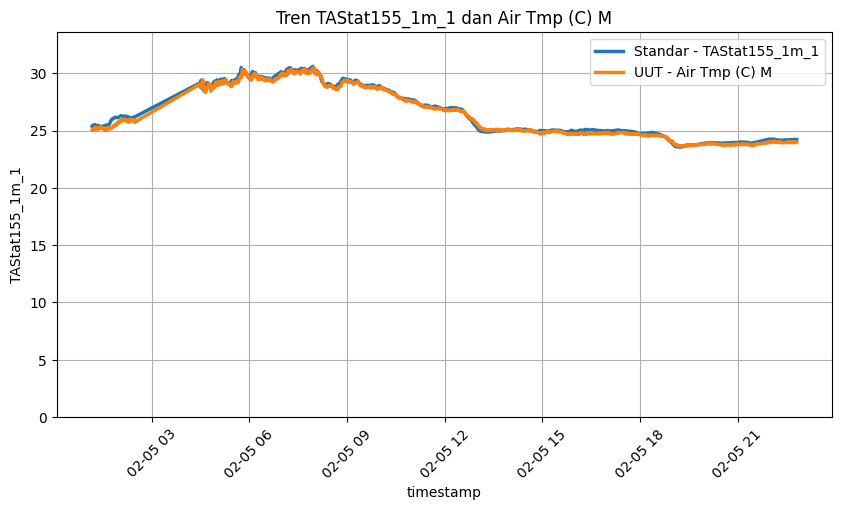

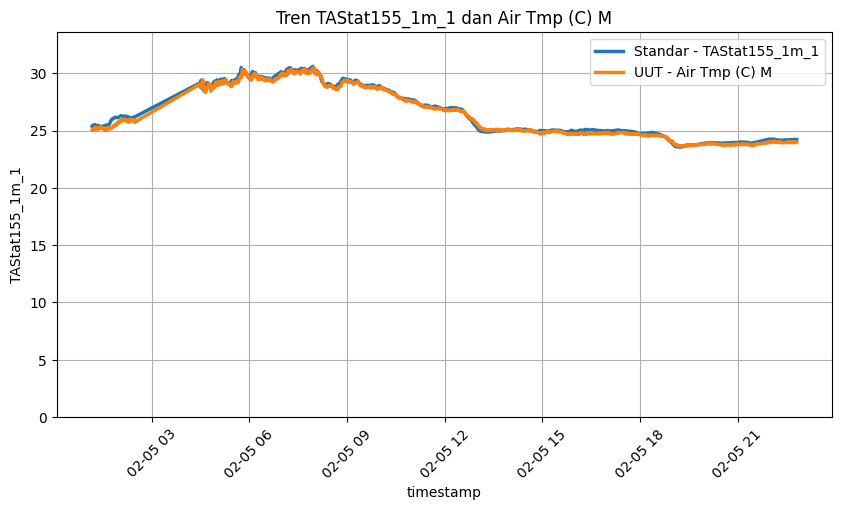

In [162]:
std_col = 'TAStat155_1m_1'
uut_col = 'Air Tmp (C) M'

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=df_merged['timestamp'], y=df_merged[std_col], label=f"Standar - {std_col}", ax=ax, linewidth=2.5)
sns.lineplot(x=df_merged['timestamp'], y=df_merged[uut_col], label=f"UUT - {uut_col}", ax=ax, linewidth=2.5)

y_max = max(df_merged[std_col].max(), df_merged[uut_col].max()) + 3
ax.set_ylim(0, y_max)
ax.set_title(f"Tren {std_col} dan {uut_col}")
ax.legend()
ax.grid(True)
plt.xticks(rotation=45)
fig